# Comparación de error relativo porcentual verdadero

Compare el desempeño del error relativo porcentual verdadero de los métodos de bisección y falsa posición.

|   Iteracion | Error Biseccion     | Error Falsa Posicion   |   Diferencia |
|------------:|:--------------------|:-----------------------|-------------:|
|           1 | 5.27868364433 %     | 0.887018978808 %       |  4.39166     |
|           2 | 1.48712466678 %     | 0.0946724895539 %      |  1.39245     |
|           3 | 1.89577948878 %     | 0.0101171697496 %      |  1.88566     |
|           4 | 0.204327410996 %    | 0.00110176456332 %     |  0.203226    |
|           5 | 0.641398627894 %    | 0.000140619920844 %    |  0.641258    |
|           6 | 0.218535608449 %    | 3.81520066919e-05 %    |  0.218497    |
|           7 | 0.00710409872667 %  | 2.72278837952e-05 %    |  0.00707687  |
|           8 | 0.0986116561346 %   | 2.60632612035e-05 %    |  0.0985856   |
|           9 | 0.0457537787039 %   | 2.59391005643e-05 %    |  0.0457278   |
|          10 | 0.0193248399886 %   | 2.59258638082e-05 %    |  0.0192989   |
|          11 | 0.00611037063098 %  | 2.59244526211e-05 %    |  

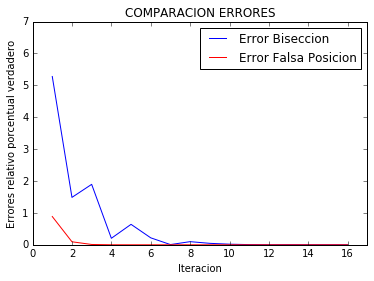

El método de falsa posición es más exacto que el de bisección, pues el error relativo porcentual verdadero del primero es mucho menor


In [21]:
import math
from tabulate import tabulate
import matplotlib.pyplot as plt
%matplotlib inline

xVerd=14.7802
m, g, v, t, xl, xu, xr, fA, fB, f1, f2, f3, xl2, xu2, xr2=68.1, 9.8, 40.0, 10.0, 12.0, 16.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 12.0, 16.0, 0.0
Error1, Error2, tabla, contador, aux1, aux2=[],[],[], [], [],[]
cont=0

def metodo1(num):
    fc=((g*m)/num)*(1-math.exp(-(num/68.1)*10.0))-v
    return fc
    
while ((fA*fB)!=0):
    xr=(xl+xu)/2
    fA=metodo1(xl)
    fB=metodo1(xr)
    erpv=math.fabs(((xVerd-xr)/xVerd)*100)
    Error1.append(erpv)
    if ((fA*fB)<0):
        xu=xr
    if((fA*fB)>0):
         xl=xr   

while ((f1*f3)!=0):
    f1=metodo1(xl2)
    f2=metodo1(xu2)
    xr2=xu2-(f2*(xl2-xu2))/(f1-f2)
    f3=metodo1(xr2)
    erpv2=math.fabs(((xVerd-xr2)/xVerd)*100)
    Error2.append(erpv2)
    if ((f1*f3)<0):
        xu2=xr2
    if((f1*f3)>0):
         xl2=xr2 

for d in range (len(Error2)):
    diferencia=Error1[d]-Error2[d]
    cont+=1
    contador.append(cont)
    aux1.append(Error1[d])
    aux2.append(Error2[d])
    tabla.append([cont, str(Error1[d])+" %", str(Error2[d])+" %", diferencia])

print tabulate(tabla, headers=["Iteracion", "Error Biseccion", "Error Falsa Posicion", "Diferencia"], tablefmt="pipe")

plt.title("COMPARACION ERRORES")
plt.axis([0, 17, 0, 7])
plt.ylabel('Errores relativo porcentual verdadero')
plt.xlabel('Iteracion')
plt.plot(contador, aux1, 'b-', label="Error Biseccion")
plt.plot(contador, aux2, 'r-', label="Error Falsa Posicion")
plt.legend(loc = 'upper right', numpoints = 2)
plt.show()

print "El método de falsa posición es más exacto que el de bisección, pues el error relativo porcentual verdadero del primero es mucho menor"